In [2]:
import pandas as pd
import numpy as np
# 強化版的matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

在上面加一個cell: esc + a, 
在下面加一個cell: esc + b, 
刪cell: esc + dd

In [3]:
path = '/Users/choushinji/pythonHW/pubg-finish-placement-prediction/train_V2.csv'
train = pd.read_csv(path)

In [4]:
train.head(20)
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [5]:
# matchId的boosts的總和，並由大到小排序
boosts = train.groupby("matchId")['boosts'].aggregate(np.sum).reset_index().sort_values('boosts', ascending=False)
# matchId的kills的最大值，並由大到小排序
kills = train.groupby("matchId")['kills'].aggregate(np.max).reset_index().sort_values('kills', ascending=False)

In [6]:
# 資料放進temp_df
temp_df = kills
temp_df = temp_df.head(20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

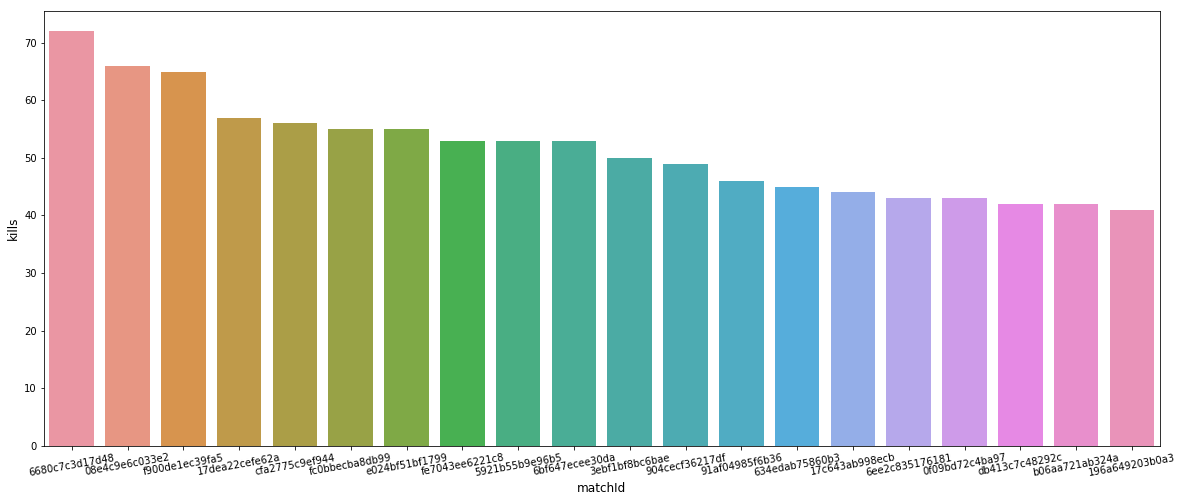

In [7]:
plt.figure(figsize=(20, 8))
sns.barplot(temp_df.matchId, temp_df.kills)
plt.xlabel('matchId', fontsize = 12)
plt.ylabel('kills', fontsize = 12)
# xticks x軸旋轉
plt.xticks(rotation=10)

In [8]:
# 戰鬥力
win = train.winPlacePerc
condition = (win == 0)
win[condition]


6          0.0
29         0.0
62         0.0
74         0.0
103        0.0
109        0.0
116        0.0
143        0.0
151        0.0
187        0.0
203        0.0
237        0.0
353        0.0
358        0.0
378        0.0
380        0.0
382        0.0
385        0.0
390        0.0
399        0.0
404        0.0
427        0.0
508        0.0
520        0.0
530        0.0
556        0.0
589        0.0
606        0.0
619        0.0
638        0.0
          ... 
4446411    0.0
4446427    0.0
4446448    0.0
4446491    0.0
4446527    0.0
4446544    0.0
4446551    0.0
4446568    0.0
4446570    0.0
4446574    0.0
4446586    0.0
4446592    0.0
4446618    0.0
4446620    0.0
4446630    0.0
4446633    0.0
4446650    0.0
4446699    0.0
4446706    0.0
4446735    0.0
4446743    0.0
4446779    0.0
4446786    0.0
4446812    0.0
4446843    0.0
4446863    0.0
4446906    0.0
4446919    0.0
4446926    0.0
4446958    0.0
Name: winPlacePerc, Length: 220505, dtype: float64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [10]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


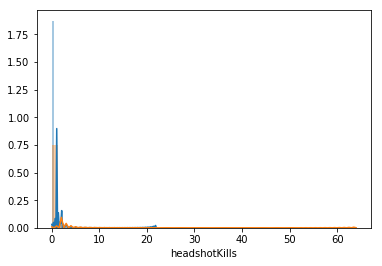

In [11]:
sns.distplot(train.assists)
sns.distplot(train.headshotKills)

In [12]:
train.matchType.value_counts().sum()

4446966

([<matplotlib.patches.Wedge at 0x1a24be87f0>,
 [Text(0.35657794116899894, 1.0406018315723253, 'squad-fpp'),
  Text(-1.0989417072699839, -0.04824027386461677, 'duo-fpp'),
  Text(-0.40821021891491693, -1.0214521120314137, 'squad'),
  Text(0.47014510862126413, -0.9944664784895969, 'solo-fpp'),
  Text(0.9499552228074866, -0.5546035292538073, 'duo'),
  Text(1.0825487395272761, -0.1951620520180743, 'solo'),
  Text(1.0992185247841666, -0.041456420145991435, 'normal-squad-fpp'),
  Text(1.099754623865611, -0.0232328923341198, 'crashfpp'),
  Text(1.099909845044211, -0.014083066953604324, 'normal-duo-fpp'),
  Text(1.099971837766305, -0.007871221062695383, 'flaretpp'),
  Text(1.099990308273106, -0.004617543203666821, 'normal-solo-fpp'),
  Text(1.0999965562269205, -0.0027525059337536245, 'flarefpp'),
  Text(1.099998537786984, -0.00179356251553577, 'normal-squad'),
  Text(1.0999994457190607, -0.00110427250219806, 'crashtpp'),
  Text(1.0999998561116267, -0.0005626316741933795, 'normal-solo'),
  Text(

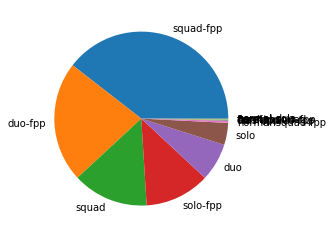

In [13]:
# 比例
temp_df = train.matchType.value_counts() / train.matchType.value_counts().sum()
plt.pie(temp_df, labels=temp_df.index)

In [14]:
def classify_heals(heals):
    if heals < 20:
        return 'low'
    elif heals >= 20 and heals < 50:
        return 'medium'
    else:
        return 'high'
train.heals.apply(lambda heals: classify_heals(heals))

0          low
1          low
2          low
3          low
4          low
5          low
6          low
7          low
8          low
9          low
10         low
11         low
12         low
13         low
14         low
15         low
16         low
17         low
18         low
19         low
20         low
21         low
22         low
23         low
24         low
25         low
26         low
27         low
28         low
29         low
          ... 
4446936    low
4446937    low
4446938    low
4446939    low
4446940    low
4446941    low
4446942    low
4446943    low
4446944    low
4446945    low
4446946    low
4446947    low
4446948    low
4446949    low
4446950    low
4446951    low
4446952    low
4446953    low
4446954    low
4446955    low
4446956    low
4446957    low
4446958    low
4446959    low
4446960    low
4446961    low
4446962    low
4446963    low
4446964    low
4446965    low
Name: heals, Length: 4446966, dtype: object

([<matplotlib.patches.Wedge at 0x1a24d159e8>,
 [Text(-1.0999999441347497, 0.0003505760232496604, 'low'),
  Text(1.0999999321252478, -0.00038642521964257087, 'medium'),
  Text(1.0999999994124907, -3.5951644095530466e-05, 'high')])

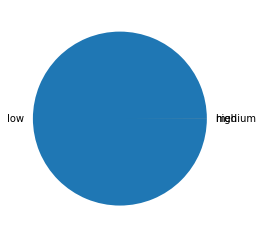

In [15]:
def classifly_roadkills(roadKills):
    if roadKills < 3:
        return 'low'
    elif roadKills >= 3 and roadKills <= 5:
        return 'medium'
    else:
        return 'high'
rk = train.roadKills.apply(lambda roadKills: classifly_roadkills(roadKills)).value_counts()
plt.pie(rk, labels=rk.index)

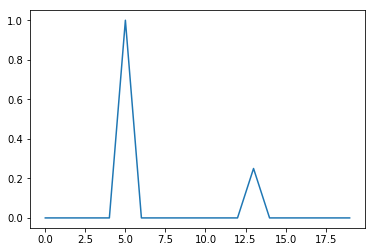

In [16]:
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
train['killWithoutMoving'] = ((train['kills']>0)&(train['totalDistance']==0))
train['headshot_rate'] = train['headshotKills']/train['kills']
# fillna就是把None填某個值，這裡是填0
train['headshot_rate'] = train['headshot_rate'].fillna(0)
headShotRate = train.headshot_rate.head(20)
sns.lineplot(headShotRate.index, headShotRate.values)

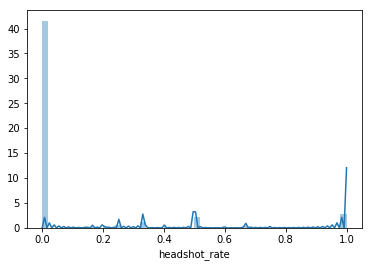

In [17]:
sns.distplot(train.headshot_rate)

In [18]:
# solos：單人玩家
# duos：雙人玩家
# squads：四人玩家
solos=train[train['numGroups']>50]
duos=train[(train['numGroups']>25)&(train['numGroups']<=50)]
squads=train[train['numGroups']<=25]

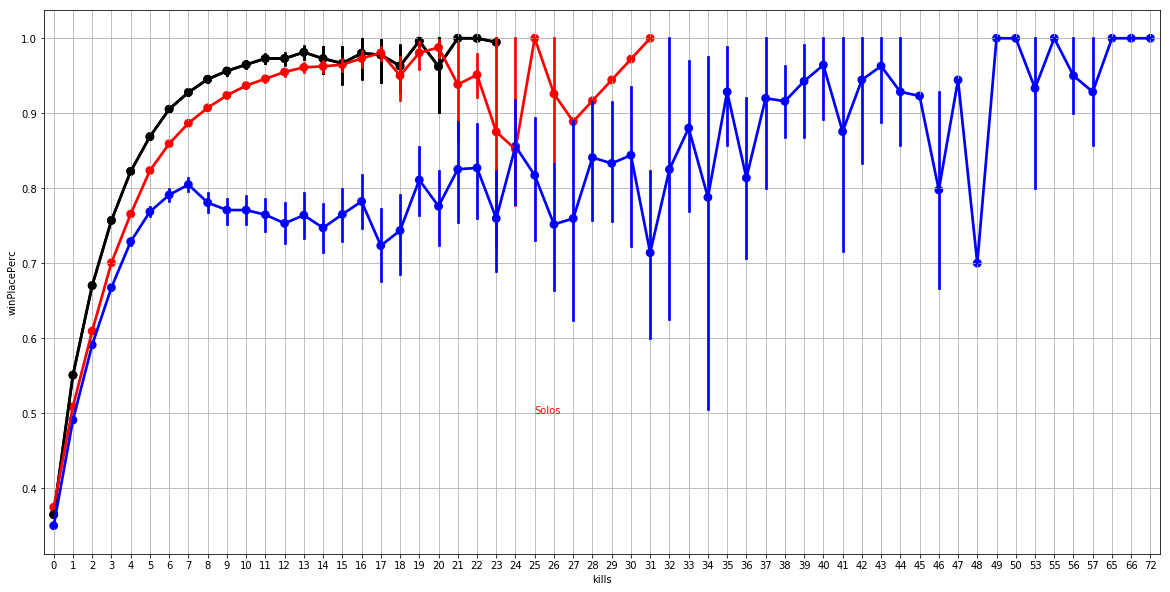

In [19]:
# f: figure, ax: 座標軸，畫在同一張圖上
f,ax =plt.subplots(figsize=(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x = 'kills' , y=  'winPlacePerc' , data = solos , color = 'black' ,alpha = 0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='red',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='blue',alpha=0.8)
plt.text(25,0.5,'Solos',color='red')
# 加網格線
plt.grid()
# 顯示出來
plt.show()

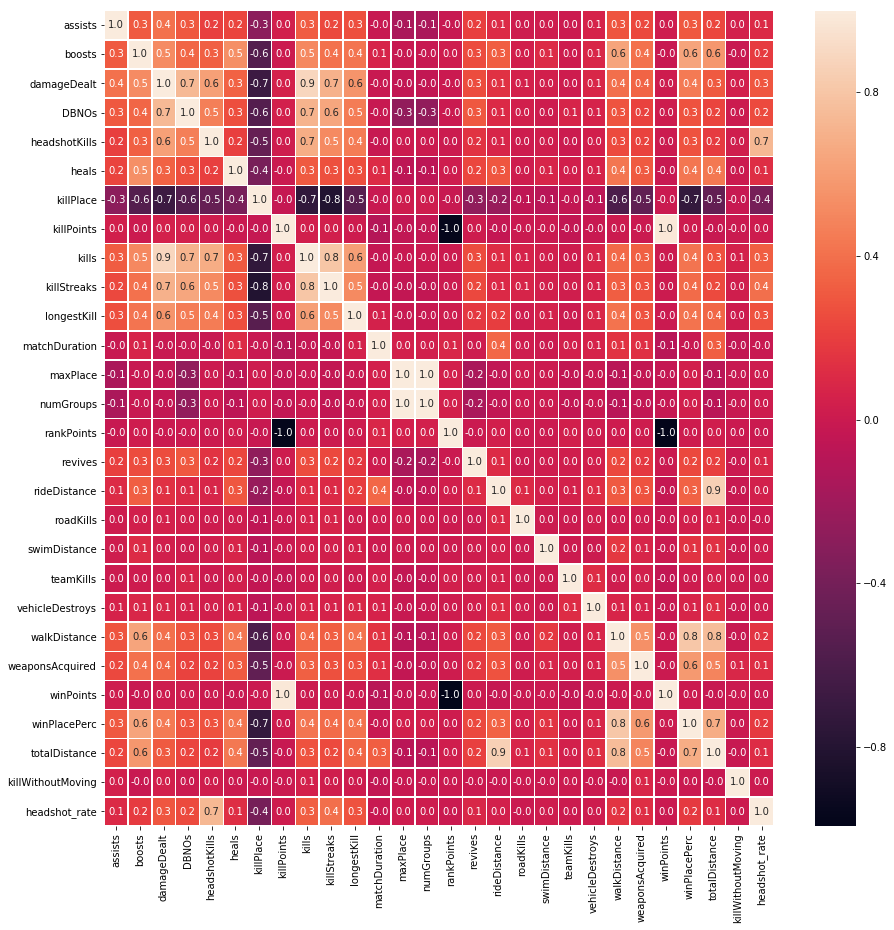

In [20]:
f,ax =plt.subplots(figsize=(15,15))
# annot: 顯示 ,linewidths=大小, fmt='裡面取值的位數
sns.heatmap(train.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
plt.show()

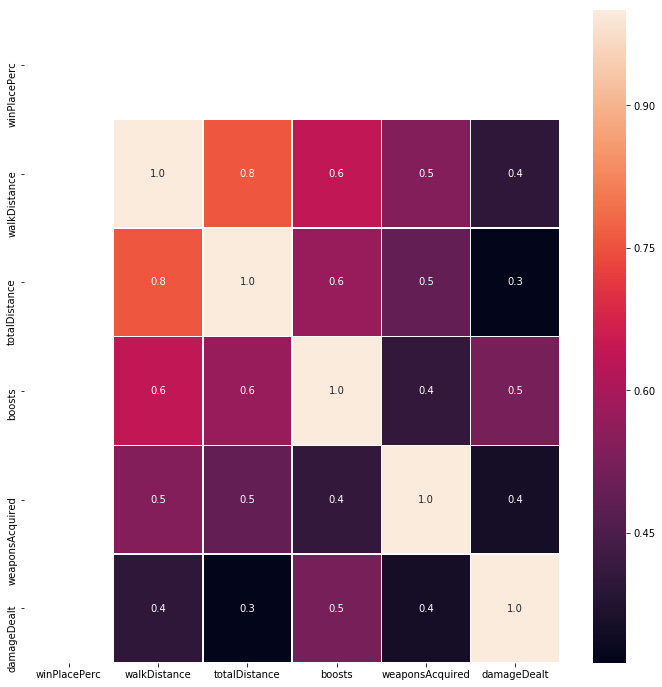

In [21]:
k = 6
f, ax = plt.subplots(figsize = (12, 12))
# corr().nlargest前?大的圖
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
# train[cols].values.T轉置
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, annot=True, linewidths=0.5, fmt='.1f', ax=ax, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

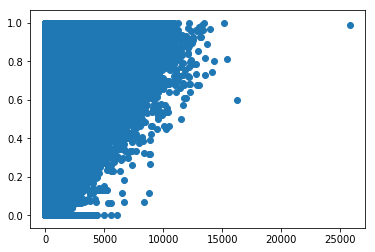

In [22]:
plt.scatter(train.walkDistance, train.winPlacePerc, )

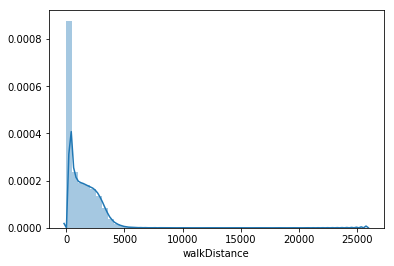

In [23]:
sns.distplot(train.walkDistance)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(np.array(train.totalDistance.sample(2000)).reshape(-1, 1), np.array(train.winPlacePerc.sample(2000)).reshape(-1, 1))
# 印出係數
print(lm.coef_)
# 印出截距
print(lm.intercept_ )

[[3.98846014e-06]]
[0.45871833]


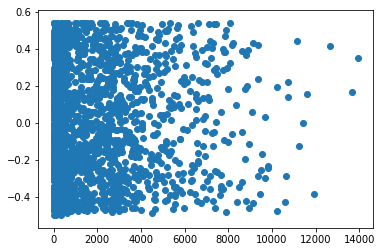

In [34]:
predict = lm.predict(np.array(train.totalDistance.sample(2000)).reshape(-1, 1))
r = np.array(train.winPlacePerc.sample(2000)).reshape(-1, 1) - predict
plt.scatter(np.array(train.totalDistance.sample(2000)).reshape(-1, 1), r)

In [35]:
import statsmodels.api as sm
data = train.dropna().sample(2000)
# spector_data = sm.datasets.spector.load(as_pandas=False)

# spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(data.totalDistance , data.winPlacePerc)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          totalDistance   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3564.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:23:20   Log-Likelihood:                -17710.
No. Observations:                2000   AIC:                         3.542e+04
Df Residuals:                    1999   BIC:                         3.543e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
winPlacePerc  4039.5927     67.667     59.699   

                            OLS Regression Results                            
Dep. Variable:          totalDistance   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3564.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:23:20   Log-Likelihood:                -17710.
No. Observations:                2000   AIC:                         3.542e+04
Df Residuals:                    1999   BIC:                         3.543e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
winPlacePerc  4039.5927     67.667     59.699   

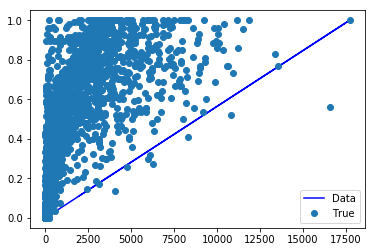

In [36]:
import statsmodels.api as sm


# data = train.dropna().sample(2000)
# spector_data = sm.datasets.spector.load(as_pandas=False)

# spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
x = data.totalDistance
y = data.winPlacePerc
# Fit and summarize OLS model
mod = sm.OLS(x , data.winPlacePerc)

res = mod.fit()


print(res.summary())


y_preds = res.predict(x)


def min_max(series):
    value = (series- series.min())/ (series.max()- series.min())
    return value
y = min_max(y)
y_preds = min_max(y_preds)


fig, ax = plt.subplots()
ax.plot(x, y_preds, 'b-', label="Data")
ax.plot(x, y, 'o', label="True")
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

                            OLS Regression Results                            
Dep. Variable:           walkDistance   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     8095.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:23:20   Log-Likelihood:                -16045.
No. Observations:                2000   AIC:                         3.209e+04
Df Residuals:                    1999   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
winPlacePerc  2648.6916     29.439     89.971   

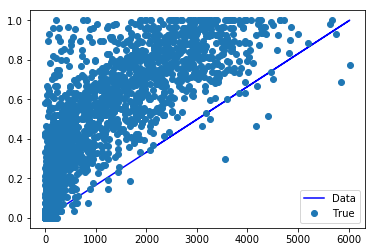

In [37]:
import statsmodels.api as sm


# data = train.dropna().sample(2000)
# spector_data = sm.datasets.spector.load(as_pandas=False)

# spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
x = data.walkDistance
y = data.winPlacePerc
# Fit and summarize OLS model
mod = sm.OLS(x , data.winPlacePerc)

res = mod.fit()


print(res.summary())


y_preds = res.predict(x)


def min_max(series):
    value = (series- series.min())/ (series.max()- series.min())
    return value
y = min_max(y)
y_preds = min_max(y_preds)


fig, ax = plt.subplots()
ax.plot(x, y_preds, 'b-', label="Data")
ax.plot(x, y, 'o', label="True")
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");